![banner](banner.png)

# Convolutional Neural Networks - Lab 1.
## Maestría en Ciencias de la Computación.
### Guillermo Reyes Martínez.

![Instrucciones](LAB1-1.png)

In [2]:
#First we shall import opencv, numpy and matplotlib libraries as they´re going to be useful for reading our images,
#treat them as matrixes and display our results.
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#This code reads the image previously stored on the same folder as this notebook, first parameter corresponds to image's name,
#second parameter "0", means it shall be read as a grayscale image.
image = cv2.imread("st1.tif", cv2.COLOR_BGR2GRAY)
image1_1 = cv2.imread("st1.tif", cv2.COLOR_BGR2GRAY)
image1_2 = cv2.imread("st1.tif", cv2.COLOR_BGR2GRAY)
image1_3 = cv2.imread("st1.tif", cv2.COLOR_BGR2GRAY)
image1_4 = cv2.imread("st1.tif", cv2.COLOR_BGR2GRAY)
image1_4_1 = cv2.imread("st1.tif", cv2.COLOR_BGR2GRAY)
image1_4_2 = cv2.imread("st1.tif", cv2.COLOR_BGR2GRAY)
imagecolor = cv2.imread("mar.jpg")
imagecolor_1 = cv2.imread("mar.jpg")
#This line returns me the size of the image in pixels, will be usefull for the zero padding function and the filter function.
x, y = image.shape[:2]
print(x, y)

440 455


In [3]:
#Then we create a variable "F" which we will use to define the size of our filter.
F = 3

By now we have read our image as a matrix of two dimensions.
![input example](inputimage.png)
As we can notice, we are not going to be capable of run our kernel in all the image as for the first and last pixels our kernel will not fit.
To solve this we are going to fill with zeros as many pixels we need.
![zero padding](zeropadding.png)

In [4]:
#Time to apply the padding to our image, so we can run our previosly defined kernel.
#This function is only used to prove how zero padding works.
def zero_padding(img, filtersize, x, y):
    #Rows and Columns are defined so that our filter will always fit.
    R = x + F - 1
    C = y + F - 1
    Z = np.zeros((R,C))
    for i in range (x):
        for j in range (y):
            Z[i + ((F-1)//2), j + ((F-1)//2)] = image[i,j]
    return Z            
    

In [5]:
print(image)
zero_padding(image, F, x, y)

[[246   0 249 ... 248 248 248]
 [247 249 250 ... 245 245 245]
 [  0 250 251 ... 243 243 255]
 ...
 [233 233 232 ... 156 150 165]
 [255 233 232 ... 157 149 165]
 [233 233 232 ... 161 150 162]]


array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 246.,   0., ..., 248., 248.,   0.],
       [  0., 247., 249., ..., 245., 245.,   0.],
       ...,
       [  0., 255., 233., ..., 149., 165.,   0.],
       [  0., 233., 233., ..., 150., 162.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [6]:
#Time to build our median blur filter. As requested the function only requires the image data and the filter size.
def median_filter(data, filter_size):
    #We declared this empty array where we shall take all the pixels we must sort in order to get the median value.
    temp = []
    #This indexer will only be used to set the boundaries of our window or kernel.
    indexer = filter_size // 2
    #This window array sets the size and the form of my kernel.
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    #This index will be used to make sure our filter kernel is centered on the right pixel and to recover the median value.
    index = len(window) // 2
    #Two for cycles one for each direction of our image data.
    for i in range(len(data)):
        for j in range(len(data[0])):
            #Data must be sorted in order to take the median value and assign it to the current value.
            data[i][j] = sorted(
                #We consider 3 cases for boundaries in x, y and set them to 0. Else we shall use the image data.
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

In [10]:
image2 = median_filter(image.copy(), 3)
image2_2 = median_filter(image.copy(), 5)
image2_3 = median_filter(image.copy(), 7)

In [8]:
print(image2)

[[  0   0 249 ... 245 245   0]
 [  0 249 249 ... 245 245 243]
 [  0 248 249 ... 245 245 243]
 ...
 [233 233 233 ... 157 157 157]
 [233 233 233 ... 157 157 157]
 [  0 232 232 ... 157 157   0]]


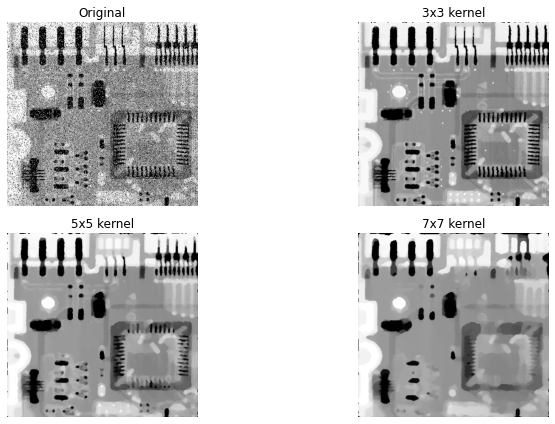

In [21]:
# Create a figure and adjust the size
fig = plt.figure(figsize=(12, 6))

# First subplot
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(image, cmap='gray')
ax1.set_title('Original')

# Second subplot
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(image2, cmap='gray')
ax2.set_title('3x3 kernel')

# Third subplot
ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(image2_2, cmap='gray')
ax3.set_title('5x5 kernel')

# Fourth subplot
ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(image2_3, cmap='gray')
ax4.set_title('7x7 kernel')

# Remove the axis ticks and labels
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

As we can see, our filter succesfully took out all the salt & pepper noise. This is expected to happen since it took the median value from each pixel´s neighborhood.

![Instrucciones](LAB1-2.png)

From now on we will focus only in the functions since we have already import the libraries and explained how zero padding works.

In [23]:
def averageFilter(data, filter_size):
    x, y = data.shape
    #Since this is a linear operation filter applied in the space domain we can create a kernel or mask by declaring 
    #a matrix full of ones the size of the desired filter and dividing it by the size of the filter squared.
    kernel = (np.ones((filter_size, filter_size)))/(filter_size**2)
    #Here we just adjust our Rows and Columns to create a empty matrix with the zero padding we need.
    R = x + filter_size - 1
    C = y + filter_size - 1
    Z = np.zeros((R,C))
    #Same as always one for loop for each axis.
    for i in range (x):
        for j in range(y):
            #Here we add the zero padding by asignin the original data to their corresponding coordinate in x, y.
            Z[i + int((filter_size - 1)/2), j + int((filter_size - 1)/2)] = data[i][j]
            #k is a variable that helps us to take slices of the full image data.
            k = Z[i:i + filter_size, j:j + filter_size]
            #l is a dummy variable where we multiply all the slice of k by our filter and sum everything to get the average
            #value of the neighborhood
            l = np.sum(k*kernel)
            #Finally we assing each l value to their corresponding index.
            data[i][j] = l
    return data

In [24]:
image3 = averageFilter(image.copy(), 3)
image3_2 = averageFilter(image.copy(), 5)
image3_3 = averageFilter(image.copy(), 7)
print(image3)

[[ 27  27  27 ...  55  55  55]
 [ 54 110 110 ... 137 137 109]
 [ 55 110 138 ... 135 135 109]
 ...
 [ 77 129 128 ...  88  87  70]
 [ 80 131 128 ...  88  86  69]
 [ 80 131 128 ...  89  86  69]]


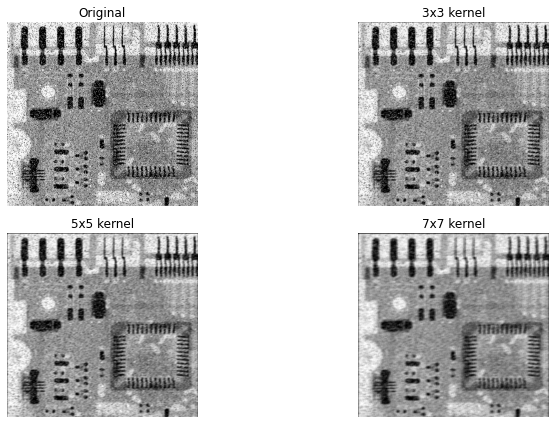

In [25]:
# Create a figure and adjust the size
fig = plt.figure(figsize=(12, 6))

# First subplot
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(image, cmap='gray')
ax1.set_title('Original')

# Second subplot
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(image3, cmap='gray')
ax2.set_title('3x3 kernel')

# Third subplot
ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(image3_2, cmap='gray')
ax3.set_title('5x5 kernel')

# Fourth subplot
ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(image3_3, cmap='gray')
ax4.set_title('7x7 kernel')

# Remove the axis ticks and labels
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()


![Instrucciones](LAB1-3.png)

In [26]:
def weighavgFilter(data):
    #This was my best attemp to recreate a weighed average kernel.
    filter_size = 5
    index = filter_size//2
    quotients = []
    for n in range(filter_size):
        quotients.append(2**n)
    kernel = (np.ones((filter_size, filter_size)))
    kernel[filter_size//2][filter_size//2] = quotients[-1]
    kernel[filter_size//2][filter_size//2 + 1] = quotients[-2]
    kernel[filter_size//2][filter_size//2 - 1] = quotients[-2]
    kernel[filter_size//2][filter_size//2 + 2] = quotients[-3]
    kernel[filter_size//2][filter_size//2 - 2] = quotients[-3]
    kernel[filter_size//2 + 1][filter_size//2] = quotients[-2]
    kernel[filter_size//2 + 1][filter_size//2 - 1] = quotients[-3]
    kernel[filter_size//2 + 1][filter_size//2 + 1] = quotients[-3]
    kernel[filter_size//2 + 1][filter_size//2 - 2] = quotients[-4]
    kernel[filter_size//2 + 1][filter_size//2 + 2] = quotients[-4]
    kernel[filter_size//2 - 1][filter_size//2] = quotients[-2]
    kernel[filter_size//2 - 1][filter_size//2 + 1] = quotients[-3]
    kernel[filter_size//2 - 1][filter_size//2 - 1] = quotients[-3]
    kernel[filter_size//2 - 1][filter_size//2 - 2] = quotients[-4]
    kernel[filter_size//2 - 1][filter_size//2 + 2] = quotients[-4]
    kernel[filter_size//2 + 2][filter_size//2] = quotients[-3]
    kernel[filter_size//2 + 2][filter_size//2 - 1] = quotients[-4]
    kernel[filter_size//2 + 2][filter_size//2 + 1] = quotients[-4]
    kernel[filter_size//2 - 2][filter_size//2 + 1] = quotients[-4]
    kernel[filter_size//2 - 2][filter_size//2] = quotients[-3]
    kernel[filter_size//2 - 2][filter_size//2 - 1] = quotients[-4]
    q_sum = np.sum(kernel)
    my_kernel = (kernel*(1/q_sum))
    
    x, y = data.shape
    quotients = []
    for n in range(filter_size):
        quotients.append(2**n)
    #Since this is a linear operation filter applied in the space domain we can create a kernel or mask by declaring 
    #a matrix full of ones the size of the desired filter and dividing it by the size of the filter squared.
    kernel = (np.ones((filter_size, filter_size)))
    
    
    #Here we just adjust our Rows and Columns to create a empty matrix with the zero padding we need.
    R = x + filter_size - 1
    C = y + filter_size - 1
    Z = np.zeros((R,C))
    #Same as always one for loop for each axis.
    for i in range (x):
        for j in range(y):
            #Here we add the zero padding by asignin the original data to their corresponding coordinate in x, y.
            Z[i + int((filter_size - 1)/2), j + int((filter_size - 1)/2)] = data[i][j]
            #k is a variable that helps us to take slices of the full image data.
            k = Z[i:i + filter_size, j:j + filter_size]
            #l is a dummy variable where we multiply all the slice of k by our filter and sum everything to get the average
            #value of the neighborhood
            l = np.sum(k*my_kernel)
            #Finally we assing each l value to their corresponding index.
            data[i][j] = l
    return data



In [27]:
image4 = weighavgFilter(image.copy())

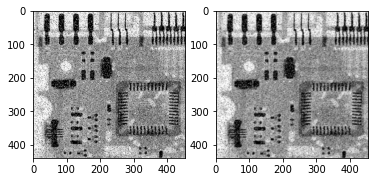

In [29]:
plt.subplot(1,2,1), plt.imshow(image, cmap='gray')
plt.subplot(1,2,2), plt.imshow(image4, cmap='gray')
plt.show()

In [30]:
#And here's a code I found on internet that works different. I do prefer mine, but I was unable to generalize the function to
#create the kernel.
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def gaussian_kernel(size, sigma=1, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D

g_k = gaussian_kernel(5)
g_k_1 = gaussian_kernel(15)

def weighavgFilterV2(data, filter_size, gaussian_kernel):
    
    #Here we just adjust our Rows and Columns to create a empty matrix with the zero padding we need.
    R = x + filter_size - 1
    C = y + filter_size - 1
    Z = np.zeros((R,C))
    #Same as always one for loop for each axis.
    for i in range (x):
        for j in range(y):
            #Here we add the zero padding by asignin the original data to their corresponding coordinate in x, y.
            Z[i + int((filter_size - 1)/2), j + int((filter_size - 1)/2)] = data[i][j]
            #k is a variable that helps us to take slices of the full image data.
            k = Z[i:i + filter_size, j:j + filter_size]
            #l is a dummy variable where we multiply all the slice of k by our filter and sum everything to get the average
            #value of the neighborhood
            l = np.sum(k*gaussian_kernel)
            #Finally we assing each l value to their corresponding index.
            data[i][j] = l
    return data

image5 = weighavgFilterV2(image1_4_1, 5, g_k)
image6 = weighavgFilterV2(image1_4_2, 15, g_k_1)

<function matplotlib.pyplot.show(close=None, block=None)>

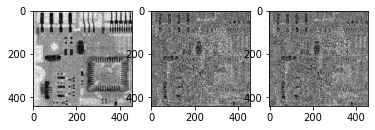

In [31]:
plt.subplot(1,3,1), plt.imshow(image, cmap='gray')
plt.subplot(1,3,2), plt.imshow(image5, cmap='gray')
plt.subplot(1,3,3), plt.imshow(image6, cmap='gray')
plt.show

![Instrucciones](LAB1-4.png)

In [4]:
def avgcolorFilter(data, filter_size):
    
    x, y, z = data.shape
    
    #Since this is a linear operation filter applied in the space domain we can create a kernel or mask by declaring 
    #a matrix full of ones the size of the desired filter and dividing it by the size of the filter squared.
    kernel = (np.ones((filter_size, filter_size, z)))/((filter_size**2)*z)
    #Here we just adjust our Rows and Columns to create a empty matrix with the zero padding we need.
    R = x + filter_size - 1
    C = y + filter_size - 1
    D = z
    Z = np.zeros((R,C,D))
    #Same as always one for loop for each axis.
    for i in range (x):
        for j in range(y):
            for m in range(z):
                #Here we add the zero padding by asignin the original data to their corresponding coordinate in x, y.
                Z[i + int((filter_size - 1)/2), j + int((filter_size - 1)/2), z-1] = data[i][j][z-1]
                #k is a variable that helps us to take slices of the full image data.
                k = Z[i:i + filter_size, j:j + filter_size, z-1]
                #l is a dummy variable where we multiply all the slice of k by our filter and sum everything to get the average
                #value of the neighborhood
                l = np.sum(k*kernel)
                #Finally we assing each l value to their corresponding index.
                data[i][j][m] = l
    return data
    



In [5]:
avgcolorFilter(imagecolor_1, 3)

array([[[ 3,  3,  3],
        [ 6,  6,  6],
        [ 6,  6,  6],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 6,  6,  6]],

       [[ 9,  9,  9],
        [15, 15, 15],
        [15, 15, 15],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [12, 12, 12]],

       [[ 8,  8,  8],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [12, 12, 12]],

       ...,

       [[ 1,  1,  1],
        [ 3,  3,  3],
        [ 5,  5,  5],
        ...,
        [26, 26, 26],
        [14, 14, 14],
        [ 4,  4,  4]],

       [[ 0,  0,  0],
        [ 1,  1,  1],
        [ 4,  4,  4],
        ...,
        [20, 20, 20],
        [ 5,  5,  5],
        [ 1,  1,  1]],

       [[ 0,  0,  0],
        [ 1,  1,  1],
        [ 2,  2,  2],
        ...,
        [17, 17, 17],
        [ 1,  1,  1],
        [ 0,  0,  0]]], dtype=uint8)

In [6]:
image7 = avgcolorFilter(imagecolor_1, 3)
print(image7)

[[[ 0  0  0]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 1  1  1]
  [ 4  4  4]
  [ 5  5  5]
  ...
  [ 5  5  5]
  [ 5  5  5]
  [ 4  4  4]]

 [[ 3  3  3]
  [ 6  6  6]
  [ 8  8  8]
  ...
  [ 8  8  8]
  [ 8  8  8]
  [ 6  6  6]]

 ...

 [[ 1  1  1]
  [ 2  2  2]
  [ 2  2  2]
  ...
  [13 13 13]
  [11 11 11]
  [ 5  5  5]]

 [[ 0  0  0]
  [ 1  1  1]
  [ 2  2  2]
  ...
  [12 12 12]
  [ 7  7  7]
  [ 2  2  2]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]
  ...
  [11 11 11]
  [ 4  4  4]
  [ 0  0  0]]]


In [35]:
cv2.imshow('Original', imagecolor)
cv2.imshow('Filtered', image7)
cv2.waitKey(0)

32

<function matplotlib.pyplot.show(close=None, block=None)>

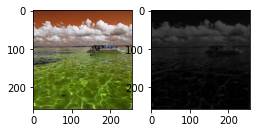

In [10]:
plt.subplot(1,3,1), plt.imshow(imagecolor, cmap='viridis')
plt.subplot(1,3,2), plt.imshow(image7, cmap='viridis')
#plt.subplot(1,3,3), plt.imshow(image6, cmap='gray')
plt.show